# Notebook Instructions

1. All the <u>code and data files</u> used in this course are available in the downloadable unit of the <u>last section of this course</u>.
2. You can run the notebook document sequentially (one cell at a time) by pressing **shift + enter**. 
3. While a cell is running, a [*] is shown on the left. After the cell is run, the output will appear on the next line.

This course is based on specific versions of python packages. You can find the details of the packages in <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank" >this manual</a>.

# Technical Indicators on Top Volatility Decile Strategy

In this notebook, you will apply technical analysis not to individual stocks or market indices but to a custom portfolio which is based on the volatility deciles, i.e. splitting the stocks according to their volatility in 10 equal subsets. The highest volatility decile would be selected for creating a trading strategy. You would then apply the moving average indicator and breakout indicator to generate trading signals and create a trading strategy. You will create a unique trading signal by merging both indicators and compare the performance of the three indicator based strategies.


After completing the notebook, you will be able to 
1. Read data from a CSV file
2. Use datetime properties
3. Sort stocks according to standard deviations of their daily returns
4. Implement two indicators: moving average and breakout indicator
5. Compute strategy returns
6. Plot cumulative strategy returns and drawdowns


In this notebook, you will perform the following steps:

1. [Read the data](#read)
2. [Calculate standard deviation](#std)
2. [Top volatility decile portfolio](#sorting)
3. [Form the portfolio](#portfolio)
3. [Trading signal and performance analytics](#analyse_SMA)<BR>
    4.1 [Moving Average](#analyse_SMA)<BR>
    4.2 [Breakout indicator](#analyse_breakout)<BR>
    4.3 [Merging both indicators](#analyse_SMA_breakout)<BR>
4. [Tweak the code](#tweak)
    
    
<a id='read'></a> 
## Read the data
The price data for the stocks in the S&P500 is stored in the CSV file. To read a CSV file, you can use `read_csv` method of `pandas`. The syntax is shown below.

Syntax: 
```python
import pandas as pd
pd.read_csv(filename,index_col)
```
1. **filename**: name of the file in the string format
2. **index_col**: the column number to set as index

This data is available in the downloadable unit of this course in the last section. You can also download the price data from finance.yahoo.com.

You will then use the `pct.change()` function to retrieve the daily returns of all the stocks in the S&P500.

In [1]:
## -------- Import the necessary libraries -------------
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')
import pandas as pd

## -------- Read the data -------------
# The data is stored in the directory 'data'
path = '../data/'
data = pd.read_csv(path +'price_data_2018_2020.csv',index_col=0)
# Convert date to date-time format
data.index = pd.to_datetime(data.index)
# Calculate daily percentage changes of the prices
data_pc = data.pct_change()
data_pc.tail(2)

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-05-13,-0.038157,-0.017484,-0.017577,-0.029745,-0.025415,0.019654,-0.017913,-0.029390,-0.042249,-0.068966,...,-0.024028,-0.012417,-0.090533,-0.022744,-0.014559,-0.042381,-0.030930,-0.022185,-0.054617,-0.007903
2020-05-14,-0.000955,-0.004123,0.012040,-0.007166,-0.005580,-0.009638,-0.008841,0.044653,0.015850,0.018088,...,0.019930,0.002411,0.001301,0.029487,0.012713,0.035430,-0.005872,0.009273,0.046750,0.024384


<a id='std'></a>
## Calculate standard deviation

You will calculate the standard deviation of the daily percentage change using the `std()` function. Standard deviation is the spread of data distribution in the given data set.

![standard deviation](https://d2a032ejo53cab.cloudfront.net/Glossary/CJVPyHpX/stddev.PNG)

where
1. xi = individual observations in the population
2. μ = mean of the observations
3. N = number of observations

We will annualize the standard deviation and express it as a percentage to help us compare the stocks' volatility.

In [2]:
# Calculate standard deviation
data_std = data_pc.loc[:'2018-12-31'].std()*(252**0.5)*100
data_std.tail()

YUM     19.627587
ZBRA    40.399247
ZBH     23.342641
ZION    25.028016
ZTS     23.517628
dtype: float64

<a id='sorting'></a>
## Top volatility decile portfolio

1. Sort the stocks by volatility
2. Select the top 10% of the stocks

The following methods/properties are used

1. `sort_values()`: The function to sort the stocks according to the standard deviation of the daily percentage returns. 
2. `len`: returns the number of rows in dataframe.
3. `plot.bar`: plots the bar chart.
4. `ylim`: to set the values of the y axis.
5. `show`: to display the graph.

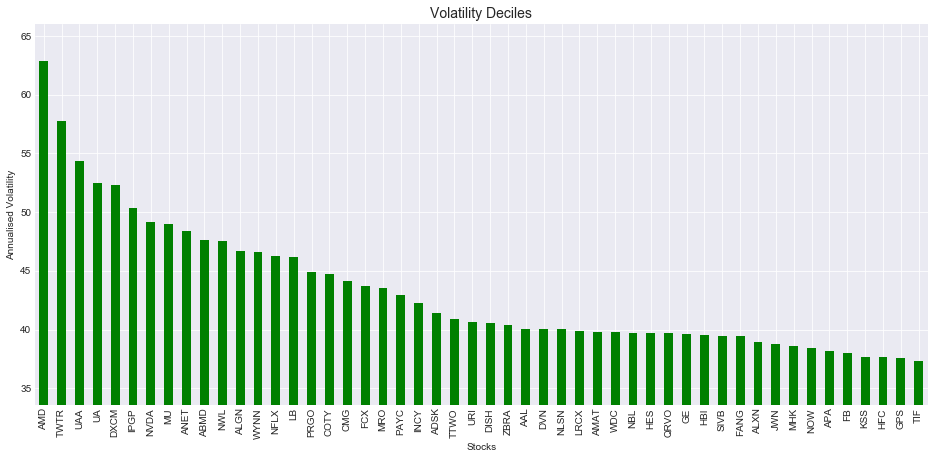

In [3]:
vol_sorted = data_std.sort_values(ascending=False)
top_decile = vol_sorted[:int(len(data_std)*0.1)]
top_decile.plot.bar(figsize=(16,7),color='green',ylim=top_decile.min()*0.9)
plt.title('Volatility Deciles', fontsize=14)
plt.xlabel('Stocks')
plt.ylabel('Annualised Volatility')
plt.show()

<a id='portfolio'></a>
## Form the portfolio
1. Get the stock data from 2019 onwards. We want to separate the period used for volatility calculation and strategy returns calculations. This is done to avoid look-ahead bias.
2. Calculate daily percentage change of each stock
3. Compute mean returns for each day. This will be the portfolio returns.
4. Then, compute the cumulate returns. This will indicate how the portfolio value has changed over the period.




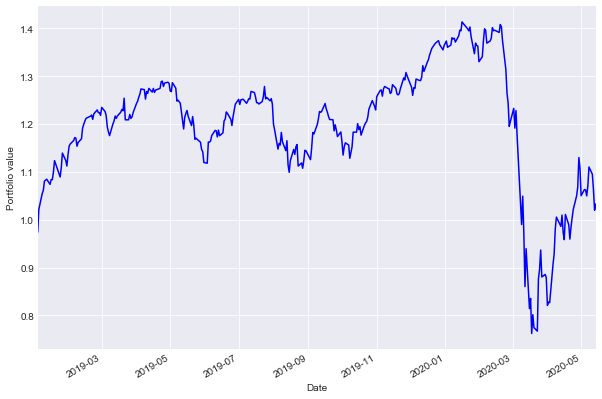

In [4]:
# Retrieve data in stock_list from 2019 January onwards
stock_data = data.loc['2019-1':,top_decile.index]
# Calculate daily percentage change of prices
stock_data_pc = stock_data.pct_change()
# Create new dataframe called portfolio
portfolio = pd.DataFrame()
# Calculate average returns of stocks
portfolio['returns'] = stock_data_pc.mean(axis=1)
# Calculate cumulative returns of portfolio
portfolio['value'] = (portfolio+1).cumprod()
# drop any rows with nan values
portfolio = portfolio.dropna()
portfolio.value.plot(color='b',figsize=(10,7))
plt.ylabel("Portfolio value")
plt.show()

<a id='analyse_SMA'></a>
## Trading signal: moving average

1. **Moving average**: Calculate the 10 days simple moving average of the portfolio value.
2. **Trading signal**: Set the signal as 1 when the portfolio value is more than the simple moving average.
3. **Strategy returns**: Multiply the strategy returns with portfolio returns



The following methods/properties are used

1. `numpy.where()`: It can be used to generate the trading signal.

Syntax:
```python
import numpy as np
np.where(condition,value_if_true,value_if_false)
```

Parameters

*   condition: Condition to check
*   value_if_true: Value if the condition is satisfied
*   value_if_false: Value if the condition is not satisfied





2. `dropna`: to remove missing values
3. `rolling`: this method is used to provide a consecutive calculation of a group of numbers. Here, rolling function with a window size of 10 is used to calculate moving average of 10 values sequentially.








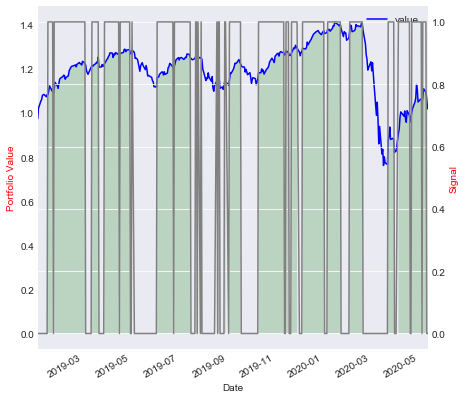

In [5]:
def get_strategy_returns_sma(portfolio):
    # Calculate simple moving average of period 10
    portfolio['sma10'] = portfolio.value.rolling(window=10).mean()
    # Create a trading signal
    portfolio['signal'] = np.where(portfolio.value > portfolio.sma10,1,0)
    # Calculate strategy returns
    portfolio['str_returns'] = portfolio['returns'].shift(-1) * portfolio['signal']
    return portfolio

def plot_signal(portfolio):
    portfolio['value'].plot(color='blue')    
    plt.fill_between(portfolio.index, portfolio.value, where=(portfolio.signal==1), facecolor='g', alpha=0.2)      
    plt.legend()
    plt.ylabel('Portfolio Value',color='r')
    # Plot signal values    
    portfolio['signal'].plot(secondary_y=True,figsize=(7,7),color='grey')
    plt.ylabel('Signal',color='r')
    plt.show()

portfolio = get_strategy_returns_sma(portfolio)    
plot_signal(portfolio)    


1. The blue line indicates the portfolio value. <BR>
2. The grey line indicates the signal. The value of 1 indicates long and 0 indicates no position. Refer to y-axis on right.<BR>
2. The green shaded area represents the period when we are long on the portfolio stocks.<BR>

## Performance analytics: moving average

**Cumulative strategy returns**

We use `cumprod()` function to calculate cumulative strategy returns.

**Drawdowns**

Drawdown can be defined as the percentage loss from the highest cumulative historical point. The formula to calculate drawdown:

Drawdown = (cumulative returns/running maximum) - 1

To calculate the running maximum, we can use `maximum()` and `accumulate()` functions. The `matplotlib.pyplot` library and `plot()` function is used to plot both the returns as well as the drawdowns

The Sharpe ratio is 1.14 


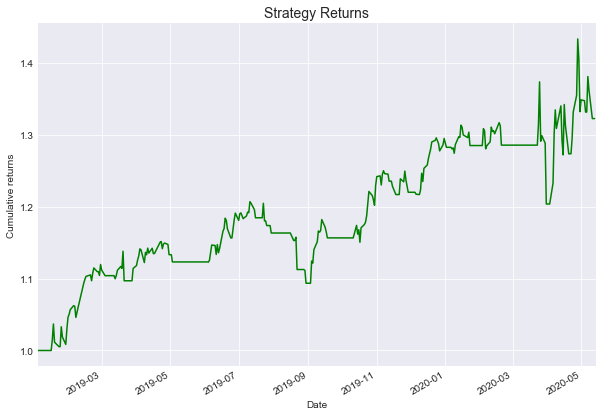

The maximum drawdown is -12.36


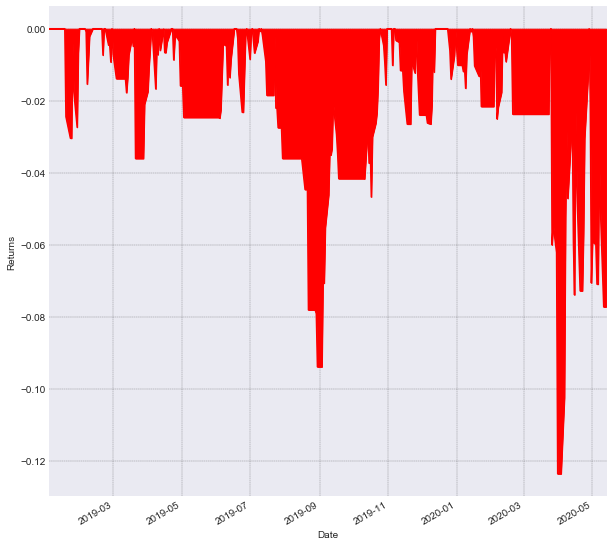

In [6]:
# Plot portfolio returns
def plot_returns_dd(portfolio):
    # ----------- Sharpe ratio ------------------
    sharpe_ratio = np.mean(portfolio.str_returns)/np.std(portfolio.str_returns)*(252**0.5)
    print('The Sharpe ratio is %.2f ' % sharpe_ratio)

    # ----------- Cumulative strategy returns ------------------
    portfolio['cum_str_returns'] = (portfolio['str_returns']+1).cumprod()
    # Plot cumulative strategy returns
    portfolio['cum_str_returns'].plot(figsize=(10,7), color='green')
    plt.title('Strategy Returns', fontsize=14)
    plt.ylabel('Cumulative returns')
    plt.show()        

    # ----------- Drawdown ------------------    
    # Calculate the running maximum
    running_max = np.maximum.accumulate(portfolio['cum_str_returns'].dropna())
    # Ensure the value never drops below 1
    running_max[running_max < 1] = 1
    # Calculate the percentage drawdown
    drawdown = (portfolio['cum_str_returns'])/running_max - 1
    max_dd = drawdown.min()*100
    print('The maximum drawdown is %.2f' % max_dd)
    # Plot drawdowns
    drawdown.plot(color='r',figsize=(10,10))
    plt.ylabel('Returns')
    plt.fill_between(drawdown.index, drawdown, color='red')
    plt.grid(which="major", color='k', linestyle='-.', linewidth=0.2)
    plt.show()    
    
plot_returns_dd(portfolio)    

<a id='analyse_breakout'></a>
## Trading signals and performance analytics: breakout

1. **Breakout**: The maximum value of the portfolio from the previous two days.
2. **Trading signal**: Create a trading signal which returns the value 1 when the current day's portfolio value is more than the maximum value computed in step 1.
3. Compute strategy returns.



The Sharpe ratio is 1.48 


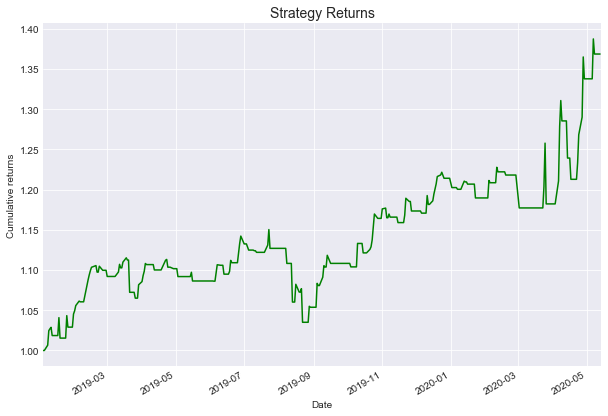

The maximum drawdown is -10.02


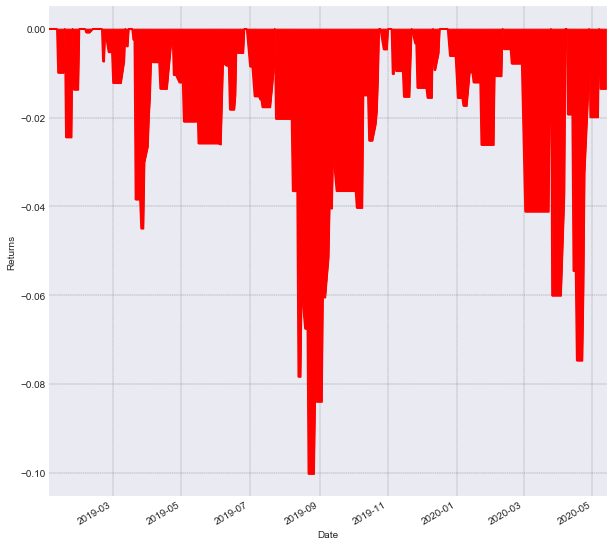

In [7]:
def get_strategy_returns_breakout(portfolio):
    # Calculate breakout indicator values
    portfolio['high'] = portfolio.value.rolling(window=3).max()
    # Create trading signal
    portfolio['signal'] = np.where(portfolio.value>=portfolio.high,1,0)
    # Calculate strategy returns
    portfolio['str_returns'] = portfolio['returns'].shift(-1) * portfolio['signal']
    return portfolio

portfolio = get_strategy_returns_breakout(portfolio)
#plot_signal(portfolio)    
plot_returns_dd(portfolio)    

In [8]:
portfolio.tail(20)

,returns,value,sma10,signal,str_returns,cum_str_returns,high
Date,,,,,,,
2020-04-17,0.055069,1.011085,0.958694,1,-0.021317,1.212825,1.011085
2020-04-20,-0.021317,0.989532,0.974998,0,-0.000000,1.212825,1.011085
2020-04-21,-0.030364,0.959486,0.980257,0,0.000000,1.212825,1.011085
2020-04-22,0.025559,0.984010,0.985781,0,0.000000,1.212825,0.989532
2020-04-23,0.020342,1.004027,0.988097,1,0.017022,1.233470,1.004027
2020-04-24,0.017022,1.021117,0.989664,1,0.028163,1.268208,1.021117
2020-04-27,0.028163,1.049874,0.996048,1,0.017250,1.290084,1.049874
2020-04-28,0.017250,1.067984,1.001881,1,0.058026,1.364943,1.067984
2020-04-29,0.058026,1.129955,1.017538,1,-0.019920,1.337753,1.129955


Not only have the cumulative strategy returns increased, but also the maximum drawdown has decreased to -10.02. 
But can we decrease the maximum drawdown further. What if we merge the two indicators?

<a id='analyse_SMA_breakout'></a>
## Trading signals and performance analytics: moving average and breakout

We will only take position when the signal returned is 1 in by moving average as well as breakout.

The Sharpe ratio is 1.58 


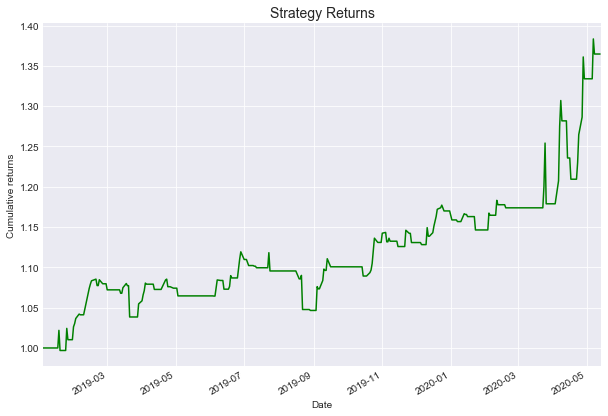

The maximum drawdown is -7.47


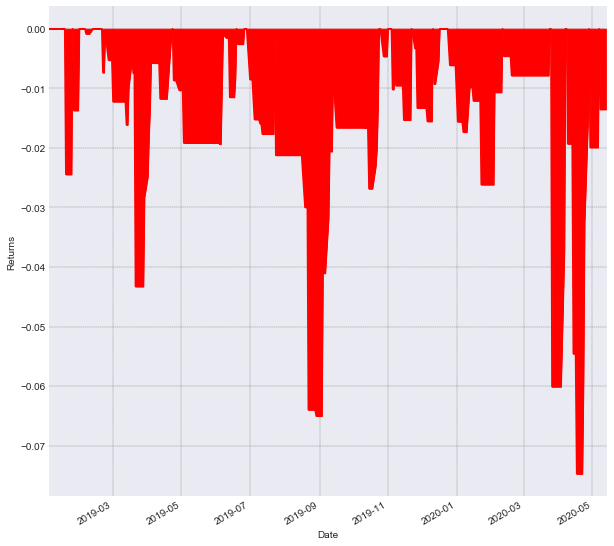

In [9]:
def get_strategy_returns_sma_breakout(portfolio):
    # Calculate simple moving average 
    sma10 = portfolio.value > portfolio.value.rolling(window=10).mean()
    # Calculate breakout indicator values
    breakout = portfolio.value>=portfolio.value.rolling(window=3).max()

    # Create trading signal
    portfolio['signal'] = np.where(sma10 & breakout,1,0)

    # Calculate strategy returns
    portfolio['str_returns'] = portfolio['returns'].shift(-1) * portfolio['signal']
    return portfolio

portfolio = get_strategy_returns_sma_breakout(portfolio)
#plot_signal(portfolio)    
plot_returns_dd(portfolio)    

<a id='Tweak'></a>

## Conclusion

You can tweak the code in the following ways
1. Try these indicators on top second decile portfolio of stocks
2. Use different number of days for SMA and breakout strategy and analyse the performance
3. Apply different technical trading indicators such as RSI, ADX indicators

In the next unit, you will learn to practice the coding through interactive exercises.
